# Summary

Module `cardiovector.plotting` contains various function that make it easy to plot VCG signals either in 3D or 2D, as 2D projections or as a time-based functions.

# Implemented functionality

- plotting VCG on 3D plot or one of three 2D projections (frontal, saggital, transverse)
- somewhat enhanced version of `wfdb.plotrec` to plot time-based signals.

# Showcase

In [1]:
import matplotlib.pyplot as plt
import wfdb

from cardiovector import plotting
from cardiovector import preprocessing

First, as always, let's load sample data from PhysioNet.

In [2]:
wfdb.dl_database('ptbdb', dl_dir='data/',
                records=['patient001/s0010_re'],
                overwrite=False)

Finished downloading files


In [3]:
raw_record = wfdb.rdrecord('data/patient001/s0010_re', physical=False)
filtered_record = preprocessing.remove_baseline_wandering(raw_record)
record = preprocessing.recslice(filtered_record, sampfrom=0, sampto=3000)

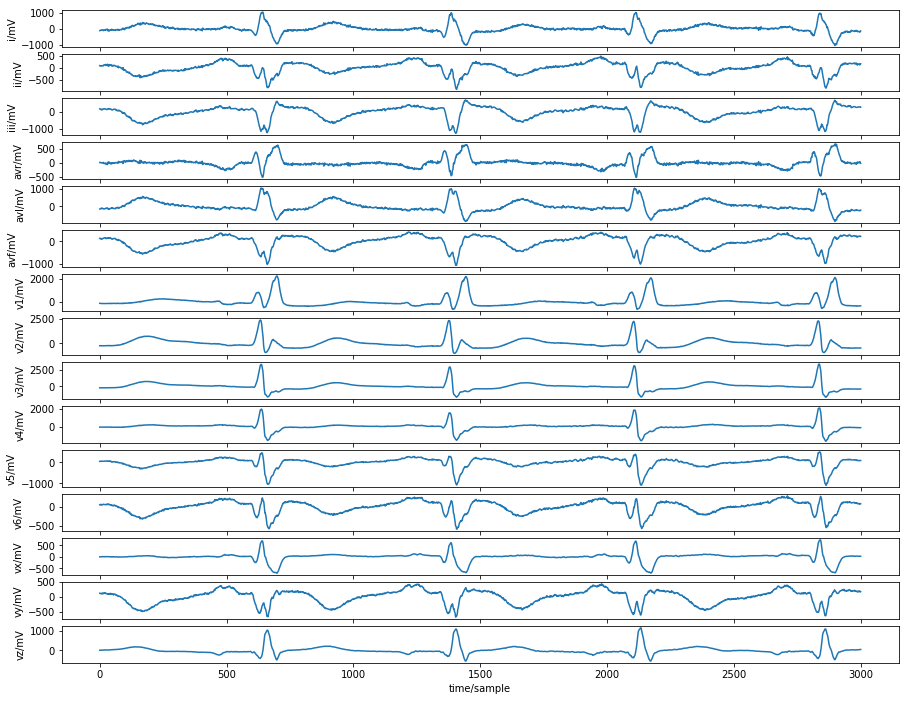

In [4]:
wfdb.plot_wfdb(record, figsize=(15, 12))

This is a classical 12-lead ECG record. You might also notice three signals named `vx`, `vy`, `vz`. These are the vectorcardiographic leads taken from the patient using actual VCG Frank 8-lead system.

# API Reference

## `plotting.plotvcg`

This is a function that plots VCG signal in 3D, as opposed to ECG-like time based representation.

In [5]:
help(plotting.plotvcg)

Help on function plotvcg in module cardiovector.plotting:

plotvcg(record:wfdb.io.record.Record, signals=None, plot='3d', xlim=None, ylim=None, zlim=None, figsize=4, plot_kw=None, fig_kw=None)
    Prepare a plot of vectorcardiogram contained in an `wfdb.Record` instance.
    
    Parameters
    ----------
    record : wfdb.Record
        The record containing VCG signals to plot.
    signals : array_like, optional
        Array containing signal names corresponding to X, Y and Z lead of the VCG.
        If not specified and `record` only holds three signals function will plot them as X, Y, Z leads.
        Otherwise, if number of signals held in record isn't equal to three, an exception will be raised.
    plot : list of str or str, optional
        Specify what plots to include in the figure. May specify a single value or a list of them - following plots
        will be added as subplots to a figure.
        Currently accepted values are: '3d', 'frontal', 'saggital', 'transverse'. A s

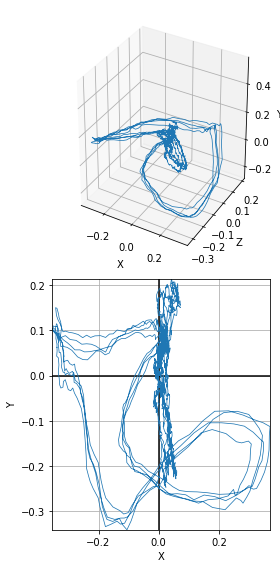

In [6]:
plotting.plotvcg(record, signals=['vx', 'vy', 'vz'],
                 plot=['3d', 'frontal'])

plt.tight_layout()
plt.grid()
plt.show()

By specifying `plot='all'` argument, you will get all 4 plots (3D + three 2D projections).

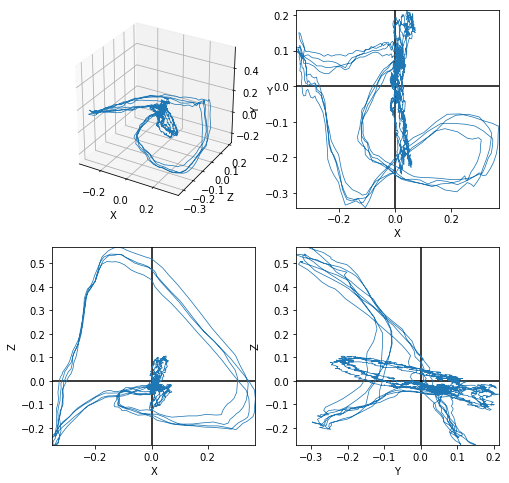

In [7]:
plotting.plotvcg(record, signals=['vx', 'vy', 'vz'],
                 plot='all')
plt.show()

## `plotting.plotrecs`

This function will plot ECG leads as a function of time. Leads from many signals may be plotted at the same time, to allow comparison between different records.

In [8]:
help(plotting.plotrecs)

Help on function plotrecs in module cardiovector.plotting:

plotrecs(record:wfdb.io.record.Record, signals=None, labels=None, sigtransform=None, fig_kw=None)
    Plot multiple WFDB records.
    
    Parameters
    ----------
    record : (N,) array-like of wfdb.Record objects
        Iterable of records containing VCG signals.
    
    signals : (M,) array-like of str, optional
        Iterable of names of signals to plot. All the signals must be present in all records in `record` arg.
    
    labels : (N,) array-like of str, optional
        Labels to assign to plotted signals. By default this will be record names.
    
    sigtransform : function(X -> ndarray) -> ndarray, optional
        Function to call on every signal about to be plotted.
    
    fig_kw : dict, optional
        Additional positional arguments for creating a `matplotlib.pyplot.Figure` object.
    
    Returns
    -------
    matplotlib.pyplot.Figure
        Object containing plotted VCG signals.



Basic usage is to plot a single WFDB record in a classical fashion. Doesn't matter if it's actually VCG. The main difference from `wfdb.plotrec` is that you can choose which signals to plot!

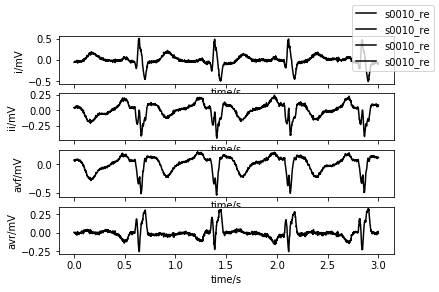

In [11]:
plotting.plotrecs(record, signals=['i', 'ii', 'avf', 'avr']);

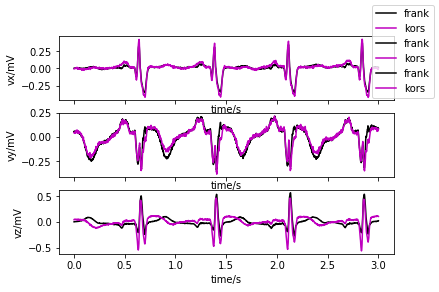

In [12]:
import cardiovector.reconstruction as rec
kors_record = rec.kors_vcg(record)

plotting.plotrecs(record=[record, kors_record], 
                  signals=['vx', 'vy', 'vz'], 
                  labels=['frank', 'kors']);